In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('graduates.csv')

In [3]:
df.head(10)

,Accounting/Finance/Contracts,Applied Research,Asians,Bachelors,Basic Research,Business/Industry,Career Change,Computer Applications,Design,Development,...,"Sales, Purchasing, Marketing",Standard Deviation,Student,Teaching,Total,Unemployed,Whites,Work Activity.Other,Working Conditions,Year
0,793888,341238,84495,671374,224277,669270,98112,297235,118772,191867,...,215169,297818.25,51891,381908,1295598,22803,1094775,99749,100886,1993
1,95346,65810,27531,125883,25328,150692,11081,67868,82344,76108,...,44780,245705.77,2154,17718,211875,3647,173067,16361,6025,1993
2,240410,170327,49984,243247,95221,279775,36072,126471,81772,123256,...,78059,276000.33,9453,104191,507616,11437,421911,35007,24843,1993
3,197407,68530,37295,235237,34892,186818,12002,123613,133430,62031,...,73133,259543.49,2477,26892,336366,8163,281442,37940,9580,1993
4,484716,239183,83826,746586,131348,665249,59302,640201,251941,200490,...,168404,269323.82,10210,234507,1070111,28925,887476,62482,56745,1993
5,430505,92954,43953,412615,54589,422697,52177,201170,68668,88026,...,223988,299207.48,11314,96751,641634,18363,555979,55478,58038,1993
6,250688,192876,78979,443589,83044,453135,27388,339093,293734,224893,...,129887,222253.95,7780,58441,653614,25498,534220,41852,17308,1993
7,156228,58694,15960,170226,33595,192643,24576,179966,79519,62935,...,59941,257410.75,641,49422,257809,2663,220119,22882,17362,1993
8,221197,132046,48879,370138,57461,358414,22820,188258,242114,179334,...,106925,240591.47,3323,38751,512533,14685,441398,37252,17187,1993
9,346864,179071,52986,484588,79689,466031,38925,278210,249013,193879,...,168140,285418.12,7189,85994,704259,24249,612910,62153,34234,1993


In [4]:
new_majors = df['Major'][df['Asians'] == 0].unique()
new_majors
df = df[~df.Major.isin(new_majors)]
df.nunique()

Accounting/Finance/Contracts                     121
Applied Research                                 121
Asians                                           121
Bachelors                                        121
Basic Research                                   121
Business/Industry                                121
Career Change                                    121
Computer Applications                            121
Design                                           121
Development                                      121
Doctorates                                       119
Educational Institution                          121
Employed                                         121
Family                                           121
Family-related                                   121
Females                                          121
Government                                       121
Highest                                            5
Human Resources                               

In [5]:
major_df = df.groupby(['Major']).sum().reset_index()
major_df.head().T

,0,1,2,3,4
Major,Biological Sciences,Chemical Engineering,Chemistry,Civil Engineering,Computer Science and Math
Accounting/Finance/Contracts,3271373,575565,969641,1525243,3094491
Applied Research,3949763,625300,1554008,743938,3098013
Asians,1423175,348315,664480,480290,1898369
Bachelors,7442522,1212633,2208027,2357166,8842608
Basic Research,2917800,324683,1033903,469259,2145030
Business/Industry,7659123,1480215,2607326,2053944,8220826
Career Change,918984,98848,298992,119154,595133
Computer Applications,2116889,492492,854254,863340,6743304
Design,1575319,799199,801452,1359806,3563296


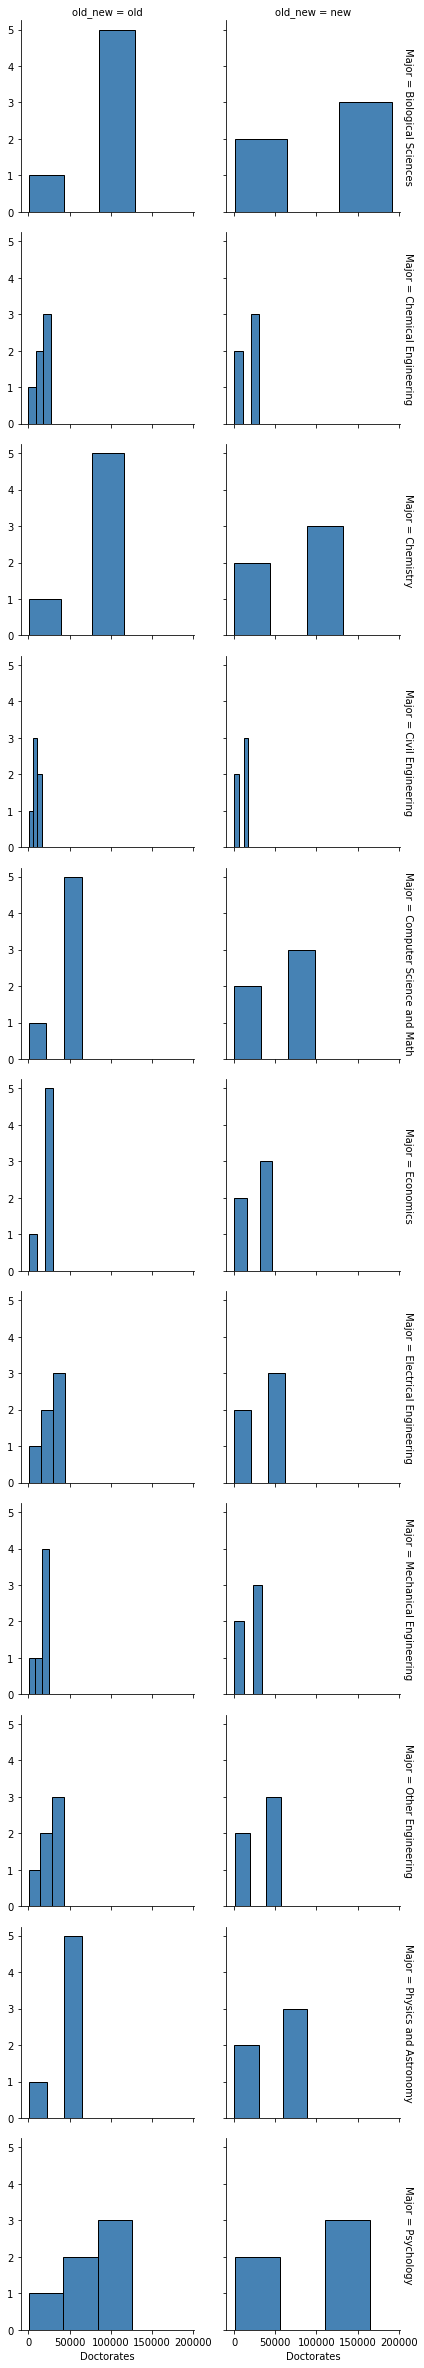

In [6]:
df.columns
df.Major.unique()
df.Year.unique()

g = lambda x: 'new' if x.Year > 2003 else 'old'
dfc = df.copy()
dfc['old_new'] = dfc.apply(g, axis=1)

f = sns.FacetGrid(dfc, col="old_new", row = 'Major', margin_titles=True)
f.map(plt.hist, "Doctorates", color="steelblue",bins = 3,edgecolor="black")
plt.show()